<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg" align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.891 · Aprendizaje automático · PEC1</p>
<p style="margin: 0; text-align:right;">2025-1 · Máster universitario en Ciencia de datos (Data science)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>


**PEC 1: Preparación de datos**

El objetivo principal de esta primera PEC es que os familiaricéis con el entorno de trabajo que vais a utilizar en el resto de actividades de la asignatura. Dicho entorno estará formado por un conjunto de dependencias a los módulos de Python necesarios para poder ejecutar de forma correcta el código que resuelve vuestra PEC. Estas dependencias las gestionaremos gracias a la ayuda de Anaconda, que, entre otras cosas, nos provee de un gestor de entornos virtuales para Python.

Otra de las herramientas fundamentales del que será vuestro nuevo entorno de trabajo será Jupyter, que os permitirá trabajar con Notebooks (ficheros \*.ipynb), como el presente enunciado, y donde podréis ejecutar vuestro código celda a celda, mostrando los resultados intermedios que necesitéis para comprender correctamente qué es lo que estáis haciendo en cada momento.

En esta primera PEC, otro de los aspectos imprescindibles que vamos a cubrir, tal y como adelanta su título, es el de la preparación de los datos. En esta PEC aprenderemos a cargar distintos conjuntos de datos o _datasets_, los combinaremos y nos ayudaremos de herramientas de visualización para comprender mejor cómo se distribuye el dato, con el objetivo de entender cómo podemos sacarle partido. Además, nos habituaremos a trabajar con conjuntos de entrenamiento y test para confirmar si las conclusiones que sacamos sobre una parte de las muestras se pueden generalizar y extrapolar al resto.

En resumen, en esta actividad veremos cómo aplicar diferentes técnicas para la carga y preparación de datos siguiendo los pasos listados a continuación:
1. Carga y combinación de los distintos conjuntos de datos (1.5 puntos)<br>
   1.1. Accidentes gestionados por la Guardia Urbana en la ciudad de Barcelona<br>
   1.2. Climatologías diarias (AEMET)<br>
2. Análisis de los datos (3 puntos)<br>
   2.1. Análisis estadístico básico<br>
   2.2. Análisis exploratorio de los datos<br>
3. Preprocesado de los datos (1 punto)<br>
4. Reducción de la dimensionalidad (2 puntos)<br>
5. Conjuntos desbalanceados de datos (1.5 puntos)<br>
6. Búsqueda y combinación de nuevos conjuntos de datos (1 punto)<br>

**Importante:** cada uno de los ejercicios puede suponer varios minutos de ejecución, por lo que la entrega debe hacerse en formato notebook y en formato html, donde se vea el código, los resultados y comentarios de cada ejercicio. Se puede exportar el notebook a html desde el menú File $\to$ Download as $\to$ HTML.

**Importante:** existe un tipo de celda especial para albergar texto. Este tipo de celda os será muy útil para responder a las diferentes preguntas teóricas planteadas a lo largo de cada PEC. Para cambiar el tipo de celda a este tipo, elegid en el menú: Cell $\to$ Cell Type $\to$ Markdown.

**Importante:** la solución planteada no debe utilizar métodos, funciones o parámetros declarados "deprecated" en futuras versiones.

**Importante:** es conveniente que utilicéis una semilla con un valor fijo (en este Notebook se os propone la variable _seed_ inicializada a 100) en todos aquellos métodos o funciones que contengan alguna componente aleatoria para aseguraros de que obtendréis siempre el mismo resultado en las distintas ejecuciones de vuestro código.

**Importante:** no olvidéis poner vuestro nombre y apellidos en la siguiente celda.

<div class="alert alert-block alert-info">
<strong>Nombre y apellidos:</strong>
</div>

Para la realización de la actividad necesitaremos importar los siguientes módulos:

In [1]:
import numpy as np
import pandas as pd

from sklearn import preprocessing
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
seed = 100

%matplotlib inline

# Carga y combinación de los distintos conjuntos de datos (1.5 puntos)

En esta PEC trabajaremos con un conjunto de datos en el que cada muestra representará uno de los accidentes gestionados por la Guardia Urbana en la ciudad de Barcelona. Este conjunto de datos incorpora el número de lesionados segun gravedad, el número de vehículos y el punto de impacto. Por otro lado, queremos enriquecer dicho conjunto de datos añadiéndole nuevos atributos descriptivos y esto lo haremos utilizando un segundo _dataset_, en el que cada muestra será la información climatológica de un día.

Comencemos con la carga de datos:

## Accidentes gestionados por la Guardia Urbana en la ciudad de Barcelona

El primer conjunto de datos, que además es el principal, está disponible dentro del servicio de datos abiertos del Ajuntament de Barcelona: [Open Data BCN](https://opendata-ajuntament.barcelona.cat/es/).

En el enlace <https://opendata-ajuntament.barcelona.cat/data/es/dataset/accidents-gu-bcn> tenéis accesible tanto el mencionado _dataset_ (separado por año) como toda la información relevante para comprender mejor con qué tipo de dato vamos a trabajar. Como puede comprobarse en la descripción, tenemos tanto el código de la calle donde ha sucedido el accidente como su nombre, pero no disponemos del tipo de vía donde sucede, algo que podría resultarnos útil. Por este motivo haremos uso de un archivo complementario que encontraremos en el siguiente enlace <https://opendata-ajuntament.barcelona.cat/data/es/dataset/carrerer>.

En el desarrollo de esta PEC y con la intención de ayudar a evitar todo tipo de accidentes, queremos averiguar qué atributos descriptivos nos dan más información acerca de la gravedad del accidente. En el conjunto de datos facilitado esta información viene desglosada en diferentes columnas referentes al número y tipo de víctimas. Para nuestro propósito, vamos a combinar la información que nos dan estas columnas en una única columna que llamaremos "gravedad" y que será nuestra variable objetivo.

En primer lugar, deberéis cargar y procesar en el Notebook los ficheros que conformarán el cuerpo del conjunto de datos con el que trabajaremos durante el resto de la actividad. Para ello podéis descargarlos manualmente de los enlaces referidos previamente o utilizar los ficheros que os facilitamos en el enunciado: "2023_accidents_gu_bcn.csv", "2024_accidents_gu_bcn.csv" y "carrerer.csv".

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> con la ayuda de <i>pandas</i>, cargad por separado los distintos ficheros que conforman el conjunto de datos de accidentes. Para ello:

<ul>
  <li>Concatenad en el mismo <i>DataFrame</i> los accidentes de los años 2023 y 2024.</li>
  <li>Generad una nueva columna llamada "gravedad" que tomará los valores numéricos 3, 2, 1 ó 0 en función de si hay muertos, heridos graves, leves o ningún tipo de víctima respectivamente.</li>
  <li>Incorporad a dicho <i>DataFrame</i> la información del tipo de vía que se encuentra en el callejero utilizando para cruzarla el código de la calle.</li>
  <li>Quedaros con las columnas referentes a la latitud y longitud en sistema WGS84, tipo de vía, día de la semana, fecha y hora, así como con la nueva columna que indicará la gravedad del accidente.</li>
</ul>

Posteriormente, mostrad:

<ul>
  <li>El número y nombre de los atributos descriptivos (variables que podrían ser usadas para predecir la variable objetivo "y").</li>
  <li>El número de filas (muestras) del conjunto de datos.</li>
  <li>Verificad si hay o no "missing values" y en qué columnas. En caso de exisitir, imputarlos utilizando 0 o el valor que creáis más conveniente.</li>
</ul>

</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Pregunta:</strong> ¿el conjunto de datos propuesto es un problema de aprendizaje automático supervisado o no?, en el caso de serlo, ¿de qué tipo de aprendizaje supervisado estaríamos hablando?

## Climatologías diarias (AEMET)

El segundo conjunto de datos complementa al conjunto de datos inicial con la información de las condiciones meteorológicas de cada día.

La combinación de ambos conjuntos de datos la haremos mediante su fecha. En nuestro caso, partiendo de la premisa de que condiciones meteorológicas menos favorables pueden conducir a un mayor riesgo de accidentes esperamos enriquecer el conjunto de datos original con información muy valiosa.

El conjunto de datos se ha obtenido del siguiente enlace: <https://opendata.aemet.es/centrodedescargas/productosAEMET?>, aunque os lo facilitamos junto al enunciado en el fichero "opendata_aemet_es.csv".

NOTA: como podréis comprobar más adelante, existen muchísimos días donde no hay precipitaciones y otros tantos donde las precipitaciones varían en cantidad, dificultando el análisis de dicha variable y no quedando claro si cuando llueve suceden más accidentes de un tipo o de otro. Es por esto que os pediremos que generéis una nueva columna en función de las precipitaciones en la que reduciréis su dominio continuo a un pequeño número de categorías.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> complementa la información del conjunto de datos de accidentes cargado en la sección anterior con el nuevo conjunto de datos:

<ul>
  <li>Cargad el conjunto de datos con las condiciones meteorológicas con la ayuda de <i>pandas</i>.</li>
  <li>Estudiad la distribución de la columna "prec" y decidid algún criterio mediante el cual podáis categorizarla en un reducido número de opciones.</li>
  <li>Incorporad al conjunto de datos de accidentes que habéis preparado en la sección anterior la información metereológica relevante cruzándola a través de la fecha.</li>
</ul>

NOTA: el nuevo conjunto de datos complementario no dispone de información meteorológica para todos los días de 2023, quedaos sólo con las muestras de accidentes que estén dentro del rango de fechas cubierto por este último _dataset_.

NOTA: podéis eliminar el año del conjunto de datos una vez lo hayáis utilizado para cruzar los accidentes con las condiciones meteorológicas.

Posteriormente, mostrad:

<ul>
  <li>El número y nombre de los atributos descriptivos (variables que podrían ser usadas para predecir la variable objetivo "y").</li>
  <li>El número de filas (muestras) del conjunto de datos.</li>
  <li>Verificad si hay o no "missing values" y en qué columnas. En caso de exisitir, imputarlos utilizando 0 o el valor que creáis más conveniente.</li>
</ul>

Sugerencia: separad el conjunto de datos original en las variables "X" (atributos descriptivos) e "y" (variable objetivo), aunque quizá pueda seros de utilidad en algún punto tenerlos también en un único DataFrame combinados.

</div>

# Análisis de los datos (3 puntos)

En este apartado visualizaremos cada una de las columnas o _features_ del dato para comprender mejor qué distribución tiene.

## Análisis estadístico básico

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> realizad un análisis estadístico básico: 
<ul>
  <li>Variables categóricas:</li>
  <ul>
    <li>Calculad la frecuencia.</li>
    <li>Haced un gráfico de barras para cada variable.</li>
  </ul>
  <li>Variables numéricas:</li>
  <ul>
    <li>Calculad estadísticos descriptivos básicos: media, mediana, desviación estandard, ...</li>
    <li>Haced un histograma para cada variable.</li>
  </ul>
</ul>
Sugerencia: podéis usar la librería "pandas" y sus funciones "describe" y "value_counts", así como las funciones "bar", "hist" y "hist2d" de <i>matplotlib</i> (esta última os vendrá bien para mostrar un mapa de calor combinando las latitudes con las longitudes).
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> comentad los resultados.
</div>

## Análisis exploratorio de los datos

En este subapartado exploraremos gráficamente la relación de los atributos descriptivos con la variable objetivo y analizaremos las diferentes correlaciones.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> usando una librería gráfica, como por ejemplo <i>matplotlib</i>, para cada una de las variables categóricas, superponed en un mismo gráfico el diagrama de barras para cada posible valor de la variable objetivo, diferenciando con distinto color según el valor de "gravedad". Añadid una leyenda para saber a qué clase corresponde cada histograma.

La finalidad es observar cómo se distribuye cada uno de los atributos en función de la clase que tengan, para poder identificar de manera visual y rápida si algunos atributos nos permiten predecir mejor que otros el valor de la variable objetivo.
    
Sugerencia: podéis usar el parámetro "alpha" en los gráficos para que se aprecien los dos histogramas.
Sugerencia: valorad la posibilidad de utilizar la escala logarítmica en el eje "y".
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> de la misma forma que en el ejercicio anterior, superponed los histogramas para los distintos valores de "gravedad" para cada variable numérica.
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> haciendo uso de la latitud y la longitud, proyecta los distintos valores de "gravedad" en una gráfica bidimensional.
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong>
<br> Mirando las gráficas, ¿qué atributos parecen tener mayor influencia en el valor final de la variable objetivo? ¿Crees que con estos atributos sería suficiente para poder determinar la gravedad del accidente?
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> identifica y elimina los valores atípicos de las variables numéricas del conjunto de datos y repite las gráficas realizadas en el ejercicio anterior para analizar cómo podrían estar afectándonos este tipo de muestras.

Es muy importante que este paso lo realicéis en una copia del dato para no perder los valores atípicos del conjunto con el que estamos trabajando, ya que continuaremos trabajando con todas las muestras del _dataset_ original en los siguientes apartados.

Nota: puedes utilizar, por ejemplo, el método IQR (Interquartile Range).
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> explica qué ocurre.
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> calculad y mostrad la correlación entre las variables numéricas.
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> comenta los resultados.
</div>

# Preprocesado de los datos (1 punto)

Una vez analizados los atributos descriptivos, es el momento de prepararlos para que nos sean útiles de cara a predecir valores.

En este apartado:
<ul>
  <li>Transformaremos los atributos descriptivos categóricos en variables numéricas para poder utilizarlas en cualquier tipo de modelo.</li>
  <li>Estandarizaremos los valores de los atributos descriptivos numéricos para que sus escalas no sean muy diferentes.</li>
  <li>Separaremos el conjunto de datos original en dos subconjuntos: entrenamiento y test.</li>
</ul>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> transforma los atributos descriptivos categóricos en variables numéricas aplicando la técnica que mejor creas conveniente.
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> estandariza todos los atributos descriptivos, que ahora son numéricos. Este será el nuevo conjunto de atributos descriptivos con el que trabajaremos desde ahora.
<hr>
Sugerencia: utilizad "StandardScaler" de <i>preprocessing</i>.
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> separa los atributos descriptivos escalados y la variable objetivo en los subconjuntos de entrenamiento y test.
<hr>
Sugerencia: para separar entre train y test podéis usar "train_test_split" de sklearn.<br>
</div>

<div style="background-color: #FAFABA; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Debate:</strong> dentro de los Foros de discusión se creará un hilo donde debatiremos si la decisión de transformar el conjunto de datos (estandarización) antes de realizar la separación del conjunto de datos en los subconjuntos de entrenamiento y test es o no una buena idea.
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> en este ejercicio hemos estandarizado los valores de los atributos descriptivos para que sus escalas no sean muy diferentes. ¿Qué nos aporta estandarizar los atributos descriptivos? ¿hay alguna situación o escenario en la que sea imprescindible?
</div>

# Reducción de la dimensionalidad (2 puntos)

En este apartado retomaremos el análisis gráfico de distribución de la variable objetivo a lo largo de las muestras del conjunto de datos. En el segundo apartado pudimos observar si las variables descriptivas por separado eran muy prometedoras o no de cara a la predicción. Aquí vamos a intentar determinar si su combinación puede ayudarnos a determinar la gravedad del accidente de mejor manera que utilizando los atributos por separado. Con este propósito, vamos a reducir la dimensionalidad del problema a solamente dos atributos, que serán la proyección de los atributos descriptivos originales, y observaremos de qué manera se distribuyen las muestras en función de su valor objetivo.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
<ul>
    <li>Aplicad el método de reducción de la dimensionalidad Principal Component Analysis (PCA) para reducir a 2 dimensiones el dataset entero con todas las <i>features</i>.</li>
    <li>Con el objetivo de visualizar si es posible predecir eficientemente el valor de la variable objetivo con este método, generad un gráfico en 2D con el resultado del PCA utilizando una escala de colores que permita distinguir de forma sencilla si los valores altos o bajos se acumulan más o menos en determinadas zonas.</li>
</ul>
    
NOTA: Tened cuidado, no incluyáis la variable objetivo en la reducción de dimensionalidad. Queremos explicar la variable objetivo en función del resto de variables reducidas a dos dimensiones.

<hr>
Sugerencia: no es necesario que programéis el algoritmo de PCA, podéis usar la implementación disponible en la librería de <i>scikit-learn</i>.<br>
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
<ul>
    <li>Repetid la reducción de dimensionalidad, pero en este caso usando TSNE.  Podéis encontrar más información acerca de este algoritmo en el siguiente enlace: <a href="https://distill.pub/2016/misread-tsne">https://distill.pub/2016/misread-tsne/</a></li>
    <li>Al igual que antes, generad un gráfico en 2D con el resultado del TSNE utilizando una escala degradada de colores para la variable objetivo ("y"), con el fin de visualizar si es posible predecir eficientemente el valor de la variable objetivo con este método.</li>
</ul>

<hr>
Sugerencia: no es necesario que programéis el algoritmo TSNE, podéis usar la implementación disponible en la librería de <i>scikit-learn</i>.<br>
Sugerencia: a parte de especificar el número de componentes, probad a usar los parámetros "learning_rate" y "perplexity".<br>
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> observando los dos gráficos, ¿crees que ha funcionado bien la reducción de dimensionalidad? ¿Crees que será útil para predecir el valor de la variable objetivo? ¿Cuál de los dos métodos ha funcionado mejor? ¿Por qué obtenemos resultados tan diferentes?
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Pregunta:</strong> ¿qué opinas de TSNE como opción para reducir la dimensionalidad? ¿Qué te parece que sólo tenga el método "fit_transform" pero no tenga "transform"? ¿Conoces alguna otra opción que, con unas prestaciones similares, evite los problemas que tiene TSNE?
</div>

# Conjuntos desbalanceados de datos (1.5 puntos)

En los problemas con variables objetivo discretas, con valores acotados, es muy común encontrar conjuntos de datos muy desbalanceados. En la industria existen múltiples ejemplos, como la detección de fraude o la fuga de clientes. Este apartado se centra en el análisis de este tipo de conjuntos.

El caso del _dataset_ con el que estamos trabajando es uno de ellos, ya que podemos ver cómo el tamaño de las clases 0 y 1 es inmensamente mayor que el del resto.

A continuación, vamos a analizar la distribución de nuestro conjunto de datos. Para ello, utilizaremos la función show_distribution definida en la siguiente celda:

In [36]:
def show_distribution(y_df):
    freq = y_df["gravedad"].value_counts().sort_index()
    plt.pie(
        freq,
        labels=(
            f"sin accidentes ({freq[0]}))",
            f"leve ({freq[1]}))",
            f"grave ({freq[2]}))",
            f"mortal ({freq[3]}))",
        ),
        autopct='%1.1f%%'
    )
    plt.title("Gravedad del accidente")
    plt.show()

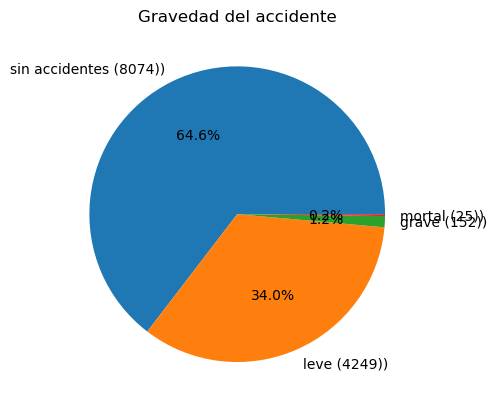

In [37]:
show_distribution(y)

Cómo se puede observar, el conjunto está bastante desbalanceado, ya que el número de muestras correspondientes a accidentes graves o mortales es mínusculo.

Para abordar el problema de datos desbalanceados, vamos a analizar la técnica de sobremuestreo (oversampling) de la clase minoritaria. En la literatura hay más técnicas que tratan de solucionar este problema, como el submuestreo (undersampling) de la clase mayoritaria, pero en esta PEC nos vamos a centrar sólo en la técnica de sobremuestreo, ya que no disponemos de un gran número de muestras que no sean de las clases mayoritarias.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> incrementad las muestras de la clase minoritaria hasta alcanzar un número similar al de elementos de la clase mayoritaria, aplicando las siguientes técnicas:
<ul>
  <li>Duplicación aleatoria (random over-sampling), fijando random_state=10.</li>
  <li>SMOTE (Synthetic Minority Over-sampling Technique), fijando random_state=10.</li>
  <li>ADASYN (Adaptive Synthetic Sampling), fijando random_state=10.</li>
</ul>
Por último, comprobad, con ayuda de la función <strong>show_distribution</strong>, que después de la aplicación de dichas técnicas el número de muestras de la clase minoritaria se ha igualado al de la mayoritaria.

<hr>

Sugerencia: para aplicar la duplicación aleatoria podéis usar "RandomOverSampler" de <i>imblearn</i>.
Sugerencia: para aplicar smote podéis usar "SMOTE" de <i>imblearn</i>.
Sugerencia: para aplicar adasun podéis usar "ADASYN" de <i>imblearn</i>.

</div>

El resultado de aplicar dichas técnicas nos debería de haber dado un número similar de muestras para todas las clases, sin embargo, cada uno de los métodos genera las nuevas muestras de la clase minoritaria de diferente forma. Con el objetivo de comprender mejor y de manera visual cómo se generan estas nuevas muestras utilizaremos, a partir de ahora, la descomposición a dos dimensiones que mejor se haya comportado en el apartado anterior.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> mostrad, mediante un <i>scatter plot</i> en función de las dos componentes a las que anteriormente hemos reducido el <i>dataset</i>, la distribución de una de las clases minoritarias del conjunto de datos original y el obtenido al aplicar cada una de las técnicas.
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> comentad los resultados.
</div>

# Búsqueda y combinación de nuevos conjuntos de datos (1 punto)

En este apartado os animamos a que busquéis de manera libre un nuevo conjunto de datos que podáis combinar de alguna forma (a través de alguno o algunos atributos comunes) con el conjunto de datos inicial para enriquecer más aún la información que tenemos de cada accidente de cara a estimar mejor su gravedad.

Es inprescindible que, una vez tengáis el conjunto de datos ampliado con el cálculo de vuestros nuevos atributos descriptivos procedentes del nuevo _dataset_, reejecutéis todo el Notebook, a excepción de la carga inicial del conjunto de datos, para comprobar el efecto de dicha ampliación.